[Reference](https://python.plainenglish.io/geopandas-tutorial-geospatial-data-handling-and-visualization-0f02e9b23993)

In [1]:
pip install geopandas

In [2]:
import geopandas as gpd

In [3]:
import geopandas as gpd
url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'
districts = gpd.read_file(url)
districts

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.13629 41.42363, 2.13640 41.42358, ..."
6,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.15949 41.44977, 2.15942 41.44960, ..."
7,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


In [4]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
districts.to_crs(epsg=2062, inplace=True)

In [6]:
districts['area'] = districts.area / 1000000

In [7]:
districts['boundary'] = districts.boundary

In [9]:
from shapely.geometry import Point
sagrada_fam = Point(2.1743680500855005, 41.403656946781304)
sagrada_fam = gpd.GeoSeries(sagrada_fam, crs=4326).to_crs(epsg=2062)
districts['sagrada_fam_dist'] = [float(sagrada_fam.distance(centroid)) / 1000 for centroid in districts.centroid]

In [10]:
districts[['area', 'boundary', 'sagrada_fam_dist']]

,area,boundary,sagrada_fam_dist
0,4.200406,"LINESTRING (1090241.744 770405.596, 1090342.58...",2.555267
1,7.456303,"LINESTRING (1090448.237 771647.183, 1090453.69...",1.573619
2,22.854384,"MULTILINESTRING ((1087409.714 768620.322, 1087...",6.479118
3,6.004220,"LINESTRING (1083492.496 771129.964, 1083500.76...",5.044077
4,19.894238,"MULTILINESTRING ((1080722.370 774743.807, 1080...",5.754595
5,4.219803,"LINESTRING (1086069.591 773802.861, 1086079.49...",1.989790
6,11.907197,"LINESTRING (1087813.190 776824.078, 1087808.82...",3.458303
7,8.048243,"LINESTRING (1089979.232 778962.760, 1089987.90...",4.733017
8,6.585717,"LINESTRING (1090068.516 778346.195, 1090069.24...",3.824280
9,10.425764,"LINESTRING (1091968.026 774578.598, 1091939.06...",2.271345


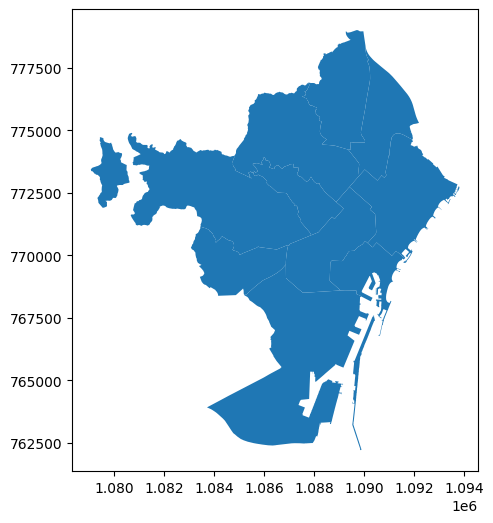

In [11]:
ax= districts.plot(figsize=(10,6))

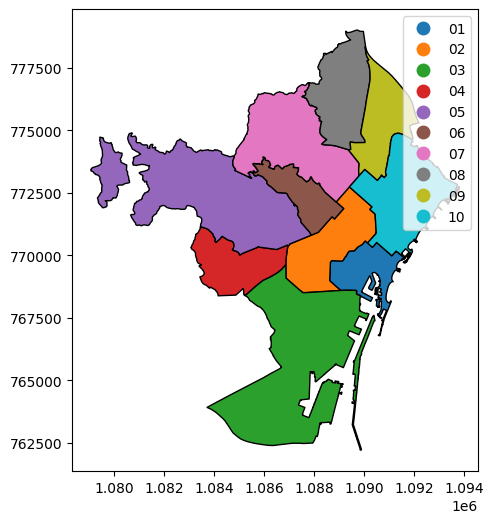

In [12]:
ax= districts.plot(column='DISTRICTE', figsize=(10,6), edgecolor='black', legend=True)

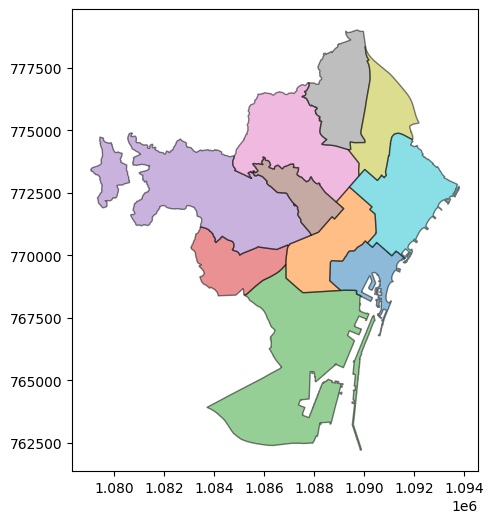

In [14]:
ax= districts.plot(column='DISTRICTE', figsize=(10,6), alpha=0.5, edgecolor='black', legend=False)
# contextily.add_basemap(ax, crs=districts.crs.to_string())